In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['low-calorie']


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
print(y)
print(y.shape)

0        1
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: low-calorie, Length: 50000, dtype: int64
(50000,)


In [ ]:
print(y_train)

20330    0
17532    1
45819    0
34807    1
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: low-calorie, Length: 40000, dtype: int64


In [ ]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 18 columns]


 **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 81.10000000000001 % and k = [18]


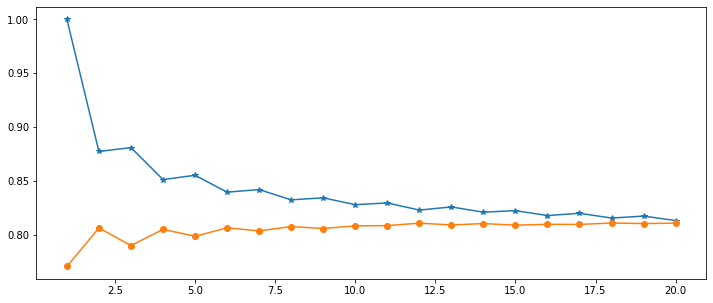

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(18)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.811

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7775,254,8029
1,1636,335,1971
All,9411,589,10000


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      8029
           1       0.57      0.17      0.26      1971

    accuracy                           0.81     10000
   macro avg       0.70      0.57      0.58     10000
weighted avg       0.78      0.81      0.77     10000



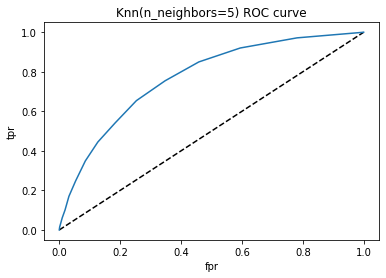

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=18) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7710089358343887

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8012
Best Parameters: {'n_neighbors': 23}


**NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [ ]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [ ]:
mod.score(X_test,y_test)

0.9963

In [ ]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[8004   25]
 [  12 1959]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       0.99      0.99      0.99      1971

    accuracy                           1.00     10000
   macro avg       0.99      1.00      0.99     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.46171508
Iteration 2, loss = 0.08369364
Iteration 3, loss = 0.01660290
Iteration 4, loss = 0.00576850
Iteration 5, loss = 0.00297756
Iteration 6, loss = 0.00175588
Iteration 7, loss = 0.00116042
Iteration 8, loss = 0.00081508
Iteration 9, loss = 0.00059963
Iteration 10, loss = 0.00045669
Iteration 11, loss = 0.00035778
Iteration 12, loss = 0.00028569
Iteration 13, loss = 0.00023214
Iteration 14, loss = 0.00019145
Iteration 15, loss = 0.00015991
Iteration 16, loss = 0.00013512
Iteration 17, loss = 0.00011535
Iteration 18, loss = 0.00009935
Iteration 19, loss = 0.00008628
Iteration 20, loss = 0.00007551
Iteration 21, loss = 0.00006660
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[8029    0]
 [   0 1971]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       1.00      1.00      1.00      1971

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

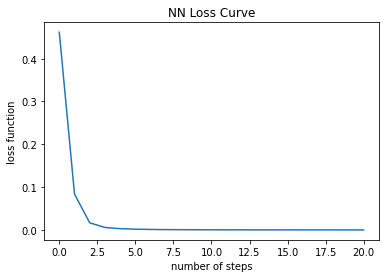

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [ ]:
(mlp.intercepts_[0]).shape

(10,)

In [ ]:
(mlp.coefs_[0]).shape

(18, 10)

In [ ]:
mlp.intercepts_[0]

array([-0.35386493,  0.47346205,  0.54258028,  0.66732341,  0.76694489,
        0.41964006,  0.25570186, -0.02555459,  0.66075292,  0.37338584])

In [ ]:
mlp.coefs_[0]

array([[-0.37371248, -0.26012885, -0.06932077,  0.09353514,  0.22295745,
         0.2908631 ,  0.23506531,  0.17336518,  0.23949728, -0.33759611],
       [-0.21104228, -0.40593247,  0.07855382,  0.24230078,  0.62257525,
         0.4174987 ,  0.13981682, -0.76896556,  0.0750898 ,  0.07787551],
       [-0.09131234, -0.24610239,  0.24370475, -0.19138503,  0.18152176,
         0.22014509,  0.00495786, -0.48736927,  0.28771652,  0.19170238],
       [ 0.07734478, -0.20381931, -0.84633307, -0.50713158, -0.81714936,
        -0.42323795,  0.99800671, -0.81400473,  0.89972185,  0.69274237],
       [ 0.13512169, -0.16622071,  0.24148159,  0.16886152,  0.59695202,
        -0.42083038,  0.12574498, -0.47642805,  0.0393136 ,  0.38529798],
       [ 0.37343107,  0.40239526,  0.03711996, -0.28082849, -0.02934734,
        -0.20739697, -0.09413404, -0.36702149, -0.19704836,  0.21009318],
       [-0.04408997,  0.06027521,  0.3299157 , -0.40517955,  0.6436728 ,
        -0.93883072,  0.14655788, -0.35038857

In [ ]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.63100941
Iteration 2, loss = 0.40209425
Iteration 3, loss = 0.22816608
Iteration 4, loss = 0.15401195
Iteration 5, loss = 0.06893968
Iteration 6, loss = 0.02379949
Iteration 7, loss = 0.01058340
Iteration 8, loss = 0.00614897
Iteration 9, loss = 0.00401889
Iteration 10, loss = 0.00277228
Iteration 11, loss = 0.00213928
Iteration 12, loss = 0.00172540
Iteration 13, loss = 0.00140283
Iteration 14, loss = 0.00116404
Iteration 15, loss = 0.00098118
Iteration 16, loss = 0.00086148
Iteration 17, loss = 0.00075745
Iteration 18, loss = 0.00064930
Iteration 19, loss = 0.00053968
Iteration 20, loss = 0.00036211
Iteration 21, loss = 0.00027961
Iteration 22, loss = 0.00025226
Iteration 23, loss = 0.00023165
Iteration 24, loss = 0.00021497
Iteration 25, loss = 0.00024240
Iteration 26, loss = 0.00019151
Iteration 27, loss = 0.00017798
Iteration 28, loss = 0.00014683
Iteration 29, loss = 0.00013358
Iteration 30, loss = 0.00012377
Iteration 31, loss = 0.00011774
Training loss did

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 1.0
[[8029    0]
 [   0 1971]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       1.00      1.00      1.00      1971

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [ ]:
logreg.intercept_.T

array([-3.60589937])

In [ ]:
logreg.coef_.T

array([[-3.66485936e-02],
       [ 1.33071565e-01],
       [ 2.80617738e-01],
       [ 3.45780980e+00],
       [ 2.40082862e-01],
       [ 1.43946393e-01],
       [ 2.59700128e-01],
       [ 1.20580677e-02],
       [-5.94560940e-03],
       [-5.94879699e-02],
       [ 4.50834724e-02],
       [-3.63709409e-02],
       [-9.65188685e-02],
       [-3.57770132e-04],
       [ 3.36408298e-02],
       [ 9.71320024e-02],
       [-9.40942994e-02],
       [-3.16058778e-03]])

In [ ]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    1
2217     0
Name: low-calorie, Length: 10000, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[8028    1]
 [   0 1971]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       1.00      1.00      1.00      1971

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

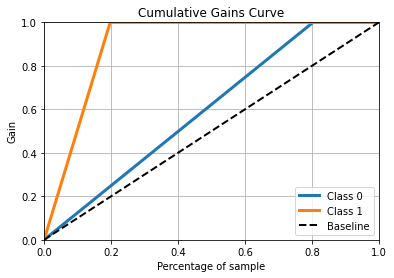

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

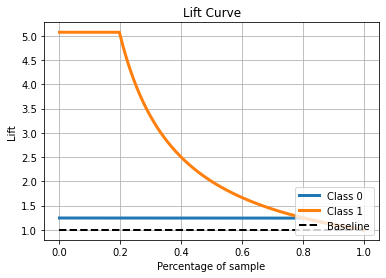

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()